# PERSONAL DATA

### **Nurkholiq Agani Hafid**

Email: nurkholiq.agani.hafid@gmail.com

ID Dicoding: [blue_devil_nur](https://www.dicoding.com/users/blue_devil_nur)


Portfolio:
* [Instagram](https://www.instagram.com/mecoliqnur/)
* [LinkedIn](https://www.linkedin.com/in/nurkholiqaganihafid/)
* [Github](https://github.com/nurkholiqaganihafid)
* [Tableau Public](https://public.tableau.com/app/profile/nurkholiq.agani.hafid/vizzes)


# DESCRIPTION

- **Brazilian E-Commerce Marketplace** adalah dataset komersial nyata yang berisi informasi tentang 100 ribu pesanan dari 2016 hingga 2018 di berbagai pasar di Brasil. Analisis yang dapat dilakukan meliputi status pesanan, harga, pembayaran, pengiriman, lokasi pelanggan, atribut produk, dan ulasan pelanggan.

- **Tujuan** dari analisis ini adalah untuk memberikan wawasan yang berharga kepada bisnis e-commerce dalam mengoptimalkan strategi penjualan, meningkatkan kepuasan pelanggan, dan mengoptimalkan pengiriman produk.

- Database ini terdiri dari sembilan tabel, antara lain **customers_dataset, geolocation_dataset, order_items_dataset, order_payments_dataset, order_reviews_dataset, orders_dataset, product_category_name_translation, products_dataset**, dan **sellers_dataset**.

- [Sumber dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)


Pertanyaan bisnis yang akan dijawab melalui analisis data ini antara lain:
1. Bagaimana performa penjualan, jumlah item pesanan, dan pendapatan (revenue) pada E-Commerce dalam beberapa bulan terakhir?
2. Produk apa yang paling banyak dan paling sedikit terjual?
3. Bagaimana distribusi skor review pada produk yang terjual dan berapa persentasenya setiap review?
4. Bagaimana distribusi waktu pengiriman produk?
5. Bagaimana karakteristik demografis dari pelanggan di sektor e-commerce marketplace?
6. Apakah ada korelasi antara harga produk (`price`) dan biaya pengiriman (`freight_value`)?
7. Bagaimana sebaran geolocation berdasarkan latitude dan longitude di Brasil?

# DATA WRANGLING

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import geopandas as gpd

from matplotlib.colors import LinearSegmentedColormap

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.rc('axes', grid=True)

%matplotlib inline

## Gathering Data


### Customers

In [2]:
customers_df = pd.read_csv('https://raw.githubusercontent.com/nurkholiqaganihafid/E_Commerce_Marketplace_Analysis/main/dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Geolocation

In [3]:
geo_df = pd.read_csv('https://raw.githubusercontent.com/nurkholiqaganihafid/E_Commerce_Marketplace_Analysis/main/dataset/geolocation_dataset.csv')
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Order Items

In [4]:
order_items_df = pd.read_csv('https://raw.githubusercontent.com/nurkholiqaganihafid/E_Commerce_Marketplace_Analysis/main/dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Order Payments

In [5]:
order_pay_df = pd.read_csv('https://raw.githubusercontent.com/nurkholiqaganihafid/E_Commerce_Marketplace_Analysis/main/dataset/order_payments_dataset.csv')
order_pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Order Reviews

In [6]:
order_rev_df = pd.read_csv('https://raw.githubusercontent.com/nurkholiqaganihafid/E_Commerce_Marketplace_Analysis/main/dataset/order_reviews_dataset.csv')
order_rev_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Orders

In [7]:
orders_df = pd.read_csv('https://raw.githubusercontent.com/nurkholiqaganihafid/E_Commerce_Marketplace_Analysis/main/dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Product Category Name Translation

In [8]:
product_category_df = pd.read_csv('https://raw.githubusercontent.com/nurkholiqaganihafid/E_Commerce_Marketplace_Analysis/main/dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Products

In [9]:
products_df = pd.read_csv('https://raw.githubusercontent.com/nurkholiqaganihafid/E_Commerce_Marketplace_Analysis/main/dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Sellers

In [10]:
sellers_df = pd.read_csv('https://raw.githubusercontent.com/nurkholiqaganihafid/E_Commerce_Marketplace_Analysis/main/dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assessing Data


### Customers

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

- Output di atas menunjukkan bahwa tidak ada missing values.

In [13]:
print('Number of duplicates in customer data: ', customers_df.duplicated().sum())

Number of duplicates in customer data:  0


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


- Output di atas tidak terdapat inaccurate value (sesuai dengan detail legend dataset)

### Geolocation

In [15]:
geo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


- Tidak ada missing value pada data `geo_df`

In [16]:
print('Number of duplicates in geolocation data: ', geo_df.duplicated().sum())

Number of duplicates in geolocation data:  261831


In [17]:
geo_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


- Tidak ada nilai yang aneh dalam output `geo_df` di atas. Karena ini adalah geolocation, maka kami belum bisa memastikannya.

### Order Items

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


- Tidak ada missing value pada data `order_items_df`
- Kolom `shipping_limit_date` tersebut harusnya tipe data **datetime**, bukan **object**

In [19]:
print('Number of duplicates in order item data: ', order_items_df.duplicated().sum())

Number of duplicates in order item data:  0


In [20]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


- Tidak ada nilai yang aneh dalam output `order_items_df` di atas

### Order Payments

In [21]:
order_pay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


- Tidak ada missing value pada data `order_pay_df`

In [22]:
print('Number of duplicates in order payment data: ', order_pay_df.duplicated().sum())

Number of duplicates in order payment data:  0


In [23]:
order_pay_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


- Tidak ada nilai yang aneh dalam output `order_pay_df` di atas

### Order Reviews

In [24]:
order_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


- Kolom `review_creation_date` dan `review_answer_timestamp` tersebut harusnya tipe data **datetime**, bukan **object**

In [25]:
order_rev_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

- Terdapat missing values pada kolom `review_comment_title` dan `review_comment_message`

In [26]:
print('Number of duplicates in order review data: ', order_rev_df.duplicated().sum())

Number of duplicates in order review data:  0


In [27]:
order_rev_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


- Output di atas tidak ada inaccurate value atau sesuai dengan detail legend dataset yaitu score 1-5

### Orders

In [28]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


- Ada missing value pada data `orders_df`
- Terdapat kesalahan tipe data pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date` dan `order_estimated_delivery_date`
- Kelima kolom tersebut harusnya tipe data **datetime**, bukan **object**

In [29]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- Output di atas menunjukkan bahwa terdapat missing values pada ketiga kolom tersebut.

In [30]:
print('Number of duplicates in order data: ', orders_df.duplicated().sum())

Number of duplicates in order data:  0


In [31]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


- Tidak ada nilai yang aneh pada data `orders_df` di atas

### Product Category Name Translation

In [32]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [33]:
print('Number of duplicates in product category data: ', product_category_df.duplicated().sum())

Number of duplicates in product category data:  0


### Products

In [34]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


- Kolom `product_name_lenght`, `product_description_lenght` dan `product_photos_qty` seharusnya tipe data **Int**. Namun, ini tidak jadi masalah

In [35]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

- Setiap kolom di atas terdapat missing values kecuali `product_id`.

In [36]:
print('Number of duplicates in product data: ', products_df.duplicated().sum())

Number of duplicates in product data:  0


In [37]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


- Tidak ada nilai yang aneh pada data `products_df` di atas

### Sellers

In [38]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


- Tidak ada missing value pada data `sellers_df`

In [39]:
print('Number of duplicates in seller data: ', sellers_df.duplicated().sum())

Number of duplicates in seller data:  0


In [40]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


- Output di atas tidak ada inaccurate value atau sesuai dengan detail legend dataset (first 5 digits of seller zip code)

## Cleaning Data


### Customers

- `customers_df` data is safe

### Geolocation

- Dalam proses assessing data sebelumnya, bahwa terdapat data yang duplicate pada `geo_df`.

In [41]:
geo_df[geo_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


- Data duplicate **geolocation** tidak perlu **didrop** atau **dihapus** karena dapat memberikan **informasi yang berguna**. Hal ini menunjukkan bahwa beberapa pelanggan berada di lokasi yang sama.
- Data ini dapat digunakan untuk membuat plot map

In [42]:
geo_df.geolocation_city.value_counts()

sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: geolocation_city, Length: 8011, dtype: int64

### Order Items

- Dalam proses assessing data sebelumnya, terdapat kesalahan dalam tipe data untuk kolom `shipping_limit_date`.
- Kolom ini akan diganti dengan tipe data `datetime`.

In [43]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [44]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Order Payments

- `order_pay_df` data is safe

### Order Reviews

#### Changing the data type

- Dalam proses assessing data sebelumnya, terdapat kesalahan dalam tipe data pada kolom `review_creation_date` dan `review_answer_timestamp`
- Kolom ini akan diganti dengan tipe data `datetime`

In [45]:
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
  order_rev_df[column] = pd.to_datetime(order_rev_df[column])

In [46]:
order_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Handling missing values

> Kolom `review_comment_title`

In [47]:
order_rev_df[order_rev_df.review_comment_title.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


> Kolom `review_comment_message`



In [48]:
order_rev_df[order_rev_df.review_comment_message.isnull()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


Berhubung nilai missing values tersebut **opsinal**, maka dapat kita isi dengan nilai `No comment` dengan menggunakan metode **imputasi**.

In [49]:
fillna_columns = ['review_comment_title', 'review_comment_message']

for column in fillna_columns:
  order_rev_df[column].fillna(value='No comment', inplace=True)

In [50]:
order_rev_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [51]:
order_rev_df.review_comment_title.value_counts()

No comment                   87656
Recomendo                      423
recomendo                      345
Bom                            293
super recomendo                270
                             ...  
Luminaria sobrepor led 18        1
Não recebi.                      1
produto com lacre violado        1
Atraso Entrega                   1
Foto enganosa                    1
Name: review_comment_title, Length: 4528, dtype: int64

### Orders

#### Handling missing values

> Kolom `order_approved_at`

In [52]:
orders_df[orders_df.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [53]:
orders_df.groupby(['order_status', orders_df.order_approved_at.isnull()]).size()

order_status  order_approved_at
approved      False                    2
canceled      False                  484
              True                   141
created       True                     5
delivered     False                96464
              True                    14
invoiced      False                  314
processing    False                  301
shipped       False                 1107
unavailable   False                  609
dtype: int64

Nilai True sama dengan nilai null

> Kolom `order_delivered_carrier_date`

In [54]:
orders_df[orders_df.order_delivered_carrier_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [55]:
orders_df.groupby(['order_status', orders_df.order_delivered_carrier_date.isnull()]).size()

order_status  order_delivered_carrier_date
approved      True                                2
canceled      False                              75
              True                              550
created       True                                5
delivered     False                           96476
              True                                2
invoiced      True                              314
processing    True                              301
shipped       False                            1107
unavailable   True                              609
dtype: int64

> Kolom `order_delivered_customer_date`

In [56]:
orders_df[orders_df.order_delivered_customer_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [57]:
orders_df.groupby(['order_status', orders_df.order_delivered_customer_date.isnull()]).size()

order_status  order_delivered_customer_date
approved      True                                 2
canceled      False                                6
              True                               619
created       True                                 5
delivered     False                            96470
              True                                 8
invoiced      True                               314
processing    True                               301
shipped       True                              1107
unavailable   True                               609
dtype: int64

- Missing values pada ketiga kolom orders tersebut tidak akan **didrop** atau **diimputasi** karena data tersebut berhubungan dengan order pelanggan.
- Mungkin saja terdapat situasi di mana pelanggan belum memberikan informasi yang diperlukan atau ada proses tertentu yang belum selesai.
- Oleh karena itu, penting untuk tetap mempertahankan data yang ada agar tidak kehilangan informasi penting.

#### Changing the data type

- Dalam proses assessing data sebelumnya, terdapat kesalahan dalam tipe data pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date` dan `order_estimated_delivery_date`
- Kolom ini akan diganti dengan tipe data `datetime`

In [58]:
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [59]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Product Category Name Translation

- `product_category_df` data is safe

### Products

> Kolom `product_category_name`

In [60]:
products_df[products_df.product_category_name.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [61]:
order_items_df[order_items_df['product_id'] == 'a41e356c76fab66334f36de622ecbd3a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
81289,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,d9cb0052a666de5308b32f32ad5f1b1c,2018-01-25 09:08:37,99.3,7.77


- Output di atas menunjukkan bahwa pelanggan yang melakukan order berdasarkan `product_id` dengan kolom `product_category_name` yang memiliki nilai null.
- Jika salah satu pelanggan sudah melakukan order, maka data dengan nilai null tersebut dikatakan valid.

> Kolom `product_height_cm`

In [62]:
products_df[products_df.product_height_cm.isnull()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
order_items_df[order_items_df['product_id'] == '09ff539a621711667c43eba6a3bd8466']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
58833,85f8ad45e067abd694b627859fa57453,1,09ff539a621711667c43eba6a3bd8466,8b8cfc8305aa441e4239358c9f6f2485,2017-02-03 21:40:02,1934.0,27.0


- Output di atas menunjukkan bahwa pelanggan yang melakukan order berdasarkan `product_id` dengan kolom `product_weight_g`,	`product_length_cm`, `product_height_cm`,	dan `product_width_cm` yang memiliki nilai null.
- Pelanggan melakukan order (valid).

In [64]:
order_items_df[order_items_df['product_id'] == '5eb564652db742ff8f28759cd8d2652a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7098,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 08:02:26,29.0,14.52
9233,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:10:16,29.0,16.05
28715,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52
28716,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:35:19,29.0,14.52
39299,595316a07cd3dea9db7adfcc7e247ae7,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-18 04:26:04,39.0,9.27
48424,6e150190fbe04c642a9cf0b80d83ee16,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-06-30 16:45:14,39.0,16.79
48980,6f497c40431d5fb0cfbd6c943dd29215,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 05:55:32,29.0,10.96
71134,a2456e7f02197951664897a94c87242d,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-06 11:50:09,29.0,24.84
73556,a7a43f469c0d7bdb0a23a82db125aefa,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-08-28 13:15:11,39.0,15.10
82767,bbfc7badbed2f1828e22b6d629201bd4,1,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-07-18 04:04:10,39.0,11.85


- Output di atas menunjukkan bahwa pelanggan yang melakukan order berdasarkan `product_id` dengan **semua kolom** yang memiliki nilai null.
- Pelanggan melakukan order (valid).

> Dari hasil output yang diberikan, dapat disimpulkan bahwa semua kolom yang memiliki nilai null `valid`. Oleh karena itu, tidak perlu menghapus data dengan nilai null tersebut untuk dapat membantu **mempertahankan integritas data**.

### Sellers

- `sellers_df` data is safe

# EXPLORATORY DATA ANALYSIS

## Geolocation

In [65]:
geo_df.sample(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
325396,13972,-22.427136,-46.815989,itapira,SP
756775,65052,-2.490804,-44.265307,sao luis,MA
60765,3578,-23.557744,-46.502492,sao paulo,SP


In [66]:
geo_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [67]:
geo_df.groupby(by='geolocation_zip_code_prefix').size().sort_values(ascending=False).reset_index(name='count')

,geolocation_zip_code_prefix,count
0,24220,1146
1,24230,1102
2,38400,965
3,35500,907
4,11680,879
...,...,...
19010,20056,1
19011,76370,1
19012,63012,1
19013,76372,1


In [68]:
zip_code = geo_df[geo_df['geolocation_zip_code_prefix'] == 24220]
zip_code

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ
...,...,...,...,...,...
474265,24220,-22.904023,-43.111683,niteroi,RJ
474266,24220,-22.905393,-43.100512,niterói,RJ
474269,24220,-22.906420,-43.104933,niteroi,RJ
474270,24220,-22.909701,-43.108452,niteroi,RJ


In [69]:
zip_code.groupby('geolocation_city').size().sort_values(ascending=False).reset_index(name='count')

,geolocation_city,count
0,niteroi,997
1,niterói,149


In [70]:
zip_code.groupby('geolocation_state').size().sort_values(ascending=False).reset_index(name='count')

,geolocation_state,count
0,RJ,1146


- Kode pos dengan nilai terbanyak adalah **24220** dengan jumlah sebanyak 1146 data.

## Sellers

In [71]:
sellers_df.sample(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1688,0951a6e282947e09cd47969f4ed0b47f,6763,taboao da serra,SP
3025,4a82168aaef173cbb6e46ae88728f919,84500,irati,PR
2401,7202e2ba20579a9bd1acb29e61fe71f6,14401,franca,SP


In [72]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [73]:
sellers_df.groupby(by='seller_city').seller_id.nunique().sort_values(ascending=False).reset_index(name='count').head()

,seller_city,count
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52


- Kota dengan jumlah penjual terbanyak adalah **Sao Paulo** dengan jumlah sebanyak **694 penjual**.

In [74]:
sellers_df.groupby(by='seller_state').seller_id.nunique().sort_values(ascending=False).reset_index(name='count').head()

,seller_state,count
0,SP,1849
1,PR,349
2,MG,244
3,SC,190
4,RJ,171


- Negara bagian dengan jumlah penjual terbanyak adalah **SP** dengan **1849 penjual**

## Order Items

In [75]:
order_items_df.sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
74917,aaa8a5ae0929b8960979af7f39d3e90b,2,99903e1e018dd80869032e7e79802059,2c9e548be18521d1c43cde1c582c6de8,2018-03-12 14:10:24,15.9,16.32
18942,2b851d9512b237dafe33b79cf00c9885,1,d3ceda8c68fb31960dab19adf28e5c6d,77530e9772f57a62c906e1c21538ab82,2017-12-05 22:53:43,99.0,17.94
22410,3330237b82c090facd2fb2ee38256be5,1,8bfd18c7b7358231b2a3f9ae98eed105,79ed755314cfe6df0daef2c6cd3022cd,2017-04-12 23:25:13,189.9,23.26


In [76]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


- Tanggal batas pengiriman pelanggan **pertama kali** pada Tgl `2016-09-19 00:15:34`
- Sedangkan tanggal batas pengiriman terakhir dilakukan adalah pada Tgl `2020-04-09 22:35:08`

## Order Items and Sellers

### Merge

In [77]:
order_items_sellers_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
order_items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [78]:
order_items_sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                112650 non-null  object        
 1   order_item_id           112650 non-null  int64         
 2   product_id              112650 non-null  object        
 3   seller_id               112650 non-null  object        
 4   shipping_limit_date     112650 non-null  datetime64[ns]
 5   price                   112650 non-null  float64       
 6   freight_value           112650 non-null  float64       
 7   seller_zip_code_prefix  112650 non-null  int64         
 8   seller_city             112650 non-null  object        
 9   seller_state            112650 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 9.5+ MB


### Number of orders by seller city

In [79]:
order_items_sellers_df.groupby(by='seller_city').order_id.nunique().sort_values(ascending=False).reset_index().head()

,seller_city,order_id
0,sao paulo,24588
1,ibitinga,6565
2,curitiba,2722
3,santo andre,2711
4,belo horizonte,2414


- Kota dengan jumlah pesanan (`order_id`) terbanyak adalah **Sao Paulo** dengan jumlah sebanyak **24.588 pesanan**.

### Number of orders by seller state

In [80]:
order_items_sellers_df.groupby(by='seller_state').order_id.nunique().sort_values(ascending=False).reset_index()

,seller_state,order_id
0,SP,70188
1,MG,7930
2,PR,7673
3,RJ,4353
4,SC,3667
5,RS,1989
6,DF,824
7,BA,569
8,GO,463
9,PE,406


- Negara bagian dengan jumlah pesanan (`order_id`) terbanyak adalah **SP** dengan jumlah sebanyak **70.188 pesanan.**
- Sedangkan pesanan terendah adalah **AC** dengan hanya **1 pesanan.**

## Order Payments

In [81]:
order_pay_df.sample(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
12096,80aa84ef8c5e289d84d1735060740d61,1,credit_card,3,89.67
17913,d7e6b2a827de13f3b539c79bb5b89577,1,credit_card,1,242.74
98402,d33aab7eec3e76dd7e074c6ff1121b6c,1,credit_card,3,34.09


In [82]:
order_pay_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


- Jumlah angsuran yang dilakukan pelanggan (`payment_installments`) **min 1 - max 24** angsuran.
- Sedangkan nilai transaksi (`payment_value`) berkisar 0 - 13664

In [83]:
order_pay_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False).reset_index()

,payment_type,order_id
0,credit_card,76505
1,boleto,19784
2,voucher,3866
3,debit_card,1528
4,not_defined,3


- Berdasarkan output di atas, metode pembayaran yang paling umum digunakan adalah `credit_card`, diikuti oleh `boleto`, `voucher`, dan `debit_card`. Terdapat juga beberapa transaksi dengan jenis pembayaran yang **tidak terdefinisi** (`not_defined`), yang jumlahnya sangat sedikit.

## Order Reviews

In [84]:
order_rev_df.sample(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3238,9ed63d22a055a4b4c89c504476489b53,72ca7a0edf21ea90416daca244df80ab,4,No comment,Tudo ok porém ainda não testei o cartucho de t...,2017-12-30,2017-12-31 19:28:16
47465,9874fee5a3672e20cacaf9665bcc1a56,5a94aa7bad40a2f6303210a8770843f6,4,No comment,No comment,2017-11-27,2017-11-28 02:09:37
86602,8715a6660de5bc8afb04b19f8c2c8614,7d29ca0cd30a3577633c14bf69919902,5,No comment,No comment,2018-04-21,2018-04-22 13:58:43


In [85]:
order_rev_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No comment,No comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


- Rata-rata survei kepuasan (`review_score`) pelanggan adalah 4

In [86]:
order_rev_df.groupby(by='review_score').review_id.nunique().sort_values(ascending=False).reset_index(name='count')

,review_score,count
0,5,56910
1,4,19007
2,1,11282
3,3,8097
4,2,3114


- Skor ulasan yang paling banyak adalah **5**, sebanyak **56.910 ulasan**.
- Hal ini merupakan produk e-commerce memiliki rating yang sangat baik.

## Order Payments and Reviews

### Merge

In [87]:
order_pay_rev_df = pd.merge(
    left=order_pay_df,
    right=order_rev_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
order_pay_rev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No comment,No comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No comment,No comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No comment,No comment,2017-12-21,2017-12-22 01:10:39


In [88]:
order_pay_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104477 entries, 0 to 104476
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 104477 non-null  object        
 1   payment_sequential       104477 non-null  int64         
 2   payment_type             104477 non-null  object        
 3   payment_installments     104477 non-null  int64         
 4   payment_value            104477 non-null  float64       
 5   review_id                103677 non-null  object        
 6   review_score             103677 non-null  float64       
 7   review_comment_title     103677 non-null  object        
 8   review_comment_message   103677 non-null  object        
 9   review_creation_date     103677 non-null  datetime64[ns]
 10  review_answer_timestamp  103677 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 9.6+ MB


In [89]:
order_pay_rev_df.duplicated().sum()

0

In [90]:
order_pay_rev_df[order_pay_rev_df.review_answer_timestamp.isnull()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
14,cf95215a722f3ebf29e6bbab87a29e61,1,credit_card,5,102.66,NaN,NaN,NaN,NaN,NaT,NaT
338,c776863a93dc0740c6e7d78104b21413,1,credit_card,3,264.08,NaN,NaN,NaN,NaN,NaT,NaT
431,81c2a9cc7a5d970fa1cb04443002088b,1,boleto,1,73.03,NaN,NaN,NaN,NaN,NaT,NaT
469,ff5b7f440481674b38554434638beebf,1,boleto,1,110.63,NaN,NaN,NaN,NaN,NaT,NaT
486,c2f065051bb7c9e7f88ebc998f332968,1,credit_card,3,37.37,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
103643,cda873529ca7ab71f677d5ec11a40304,1,credit_card,2,75.90,NaN,NaN,NaN,NaN,NaT,NaT
104015,71c0d1686c9b5556355dc29a0f5cf8dd,1,credit_card,1,98.20,NaN,NaN,NaN,NaN,NaT,NaT
104395,b87c9466fb7a6b04a632222b07c1922d,1,credit_card,6,125.42,NaN,NaN,NaN,NaN,NaT,NaT
104397,a722dd5ab3a3cf4065a47d75a502fdab,1,credit_card,6,226.70,NaN,NaN,NaN,NaN,NaT,NaT


- Dari output di atas, ternyata masih banyak pelanggang yang masih belum melakukan ulasan terhadap barang yang dia beli.
- Karena ini opsional maka tidak jadi masalah.
- Namun pelanggan lainnya yang belum membeli produk tersebut tidak akan mendapatkan feedback lebih, dengan produk yang sudah dibeli oleh pelanggan lainnya.

### Number of orders by review score

In [91]:
order_pay_rev_df.groupby(by='review_score').order_id.nunique().sort_values(ascending=False).reset_index(name='count')

,review_score,count
0,5.0,57076
1,4.0,19098
2,1.0,11392
3,3.0,8160
4,2.0,3148


- Skor ulasan dengan nilai **5** memiliki jumlah pesanan yang **paling banyak**, yaitu sebanyak **57.076 pesanan**.

## Orders

In [92]:
orders_df.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
13344,5dacd5be3242e33184345b90ae5ef770,cd7f3a5aad9d5c00db3b02a051df14c4,delivered,2017-12-29 00:49:20,2018-01-03 04:32:29,2018-01-04 22:35:20,2018-01-24 19:33:59,2018-02-06
36511,5ef13293f44c9ba1b12e98237a956679,3c1b792ee531dc8feec4424412320fc2,delivered,2017-12-02 21:37:24,2017-12-02 22:05:06,2017-12-07 15:29:04,2017-12-11 22:14:00,2017-12-29
12626,d7d09bb28b0aaf12389e3109664c1377,66ff55b6d499c819ee2ab54d7b7e198e,delivered,2017-05-28 14:09:26,2017-05-28 14:25:10,2017-05-29 13:58:12,2017-06-09 15:53:11,2017-06-29


In [93]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [94]:
orders_df.groupby(by='order_status').order_id.nunique().sort_values(ascending=False).reset_index()

,order_status,order_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


- Berdasarkan output di atas, bahwa mayoritas pesanan telah "terkirim" (`delivered`), diikuti dengan pesanan yang "dalam pengiriman" (`shipped`), "dibatalkan" (`canceled`) dan "tidak tersedia" (`unavailable`). Jumlah pesanan yang "terkirim" jauh lebih tinggi dibandingkan dengan jenis status pesanan lainnya seperti "faktur" (`invoiced`), "sedang diproses" (`processing`), "dibuat" (`created`), dan "disetujui" (`approved`).

> Membuat sebuah kolom baru untuk memuat waktu pengiriman pesanan (`order_delivery_time`) tiap order.

In [95]:
order_delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
order_delivery_time

0        8 days 10:28:40
1       13 days 18:46:08
2        9 days 09:27:40
3       13 days 05:00:36
4        2 days 20:58:23
              ...       
99436    8 days 05:13:56
99437   22 days 04:38:58
99438   24 days 20:37:34
99439   17 days 02:04:27
99440    7 days 16:11:00
Length: 99441, dtype: timedelta64[ns]

In [96]:
order_delivery_time = order_delivery_time.apply(lambda x: x.total_seconds())
order_delivery_time

0         728920.0
1        1190768.0
2         811660.0
3        1141236.0
4         248303.0
           ...    
99436     710036.0
99437    1917538.0
99438    2147854.0
99439    1476267.0
99440     663060.0
Length: 99441, dtype: float64

In [97]:
# Selanjutnya diubah ke dalam satuan hari (dibagi 86400)
orders_df['order_delivery_time'] = round(order_delivery_time/86_400)

In [98]:
orders_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0


> Membuat sebuah kolom baru untuk memuat waktu pengiriman perkiraan pesanan sampai (`estimated_delivery_time`) tiap order.

In [99]:
estimated_delivery_time = orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date']
estimated_delivery_time

0        7 days 02:34:47
1        5 days 08:32:15
2       17 days 05:53:31
3       12 days 23:31:18
4        9 days 05:42:58
              ...       
99436   10 days 08:51:59
99437    1 days 06:22:04
99438    5 days 12:35:43
99439   20 days 00:27:06
99440   17 days 10:51:30
Length: 99441, dtype: timedelta64[ns]

In [100]:
estimated_delivery_time = estimated_delivery_time.apply(lambda x: x.total_seconds())
estimated_delivery_time

0         614087.0
1         462735.0
2        1490011.0
3        1121478.0
4         798178.0
           ...    
99436     895919.0
99437     109324.0
99438     477343.0
99439    1729626.0
99440    1507890.0
Length: 99441, dtype: float64

In [101]:
orders_df['estimated_delivery_time'] = round(estimated_delivery_time/86_400)

In [102]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,5.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,17.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,9.0


In [103]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96476.000000,96476.000000
unique,99441,99441,8,98875,90733,81018,95664,459,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00,NaN,NaN
freq,1,1,96478,3,9,47,3,522,NaN,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.517548,11.008655
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.550516,10.190594
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-189.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,6.000000


- Dari output di atas, dapat disimpulkan bahwa rata-rata waktu pengiriman pesanan (`order_delivery_time`) adalah **12 hari**, dengan nilai maksimum **210 hari** dan nilai minimum **1 hari**.
- Sedangkan rata-rata waktu pengiriman perkiraan pesanan sampai (`estimated_delivery_time`) adalah **11 hari**, dengan max **146 hari** dan min **-189 hari**.

> Melihat data yang memiliki nilai `-189.000000`, untuk memastikan apakah datanya valid.

In [104]:
orders_df[orders_df['estimated_delivery_time'] == -189.000000]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time
55619,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,208.0,-189.0


- Dari hasil tersebut ada **kesalahan dalam pengisian data** pada kolom `order_delivered_customer_date` atau **kesalahan dalam perhitungan waktu**.
- Namun, jika di analisa `2018-09-19 23:24:07` manjadi `2018-02-19` atau `2018-03-19`, tidak masuk akal dengan nilai kolom yang lainnya.
- Maka, mari kita analisis lebih lanjut dengan `<= -0`.

> Memastikan apakah ada data yang memiliki nilai kolom `estimated_delivery_time` `<= -0`.

In [105]:
row_with_negative_value = orders_df[orders_df['estimated_delivery_time'] <= -0]
row_with_negative_value

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,21.0,-12.0
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,29.0,-10.0
35,8563039e855156e48fccee4d611a3196,5f16605299d698660e0606f7eae2d2f9,delivered,2018-02-17 15:59:46,2018-02-17 16:15:34,2018-02-20 23:03:56,2018-03-20 00:59:25,2018-03-20,30.0,-0.0
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,34.0,-8.0
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,25.0,-2.0
...,...,...,...,...,...,...,...,...,...,...
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,23.0,-4.0
99407,c2af225ac9a68a3c24500aa6fab006aa,f93c9e539a9705a57902c625b611e90c,delivered,2018-08-20 10:04:30,2018-08-20 14:53:46,2018-08-22 13:16:00,2018-08-27 21:44:45,2018-08-28,7.0,0.0
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,40.0,-22.0
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,20.0,-2.0


In [106]:
row_with_negative_value.order_status.value_counts()

delivered    9105
canceled        1
Name: order_status, dtype: int64

- Ternyata banyak data yang memiliki nilai `<= -0` yaitu `9106 rows` dan `order_status` sudah terkirim (`delivered`).
- Maka dapat dikatakan data tersebut `valid` dan tidak menutup kemungkinan adanya ***human error***.

## Customers

In [107]:
customers_df.sample(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
26171,7afbe2a19af0e783ebc30e16983924ed,03e0b6f13c0a3b1e365a78c3745c5945,78740,rondonopolis,MT
79261,96a3b4954fb2578bdc8544628f3e3e9a,9ba8e489ac0a013927b63181523c519e,9751,sao bernardo do campo,SP
32435,cad3755cd25620f59e9194b0dc9b7e95,86564b6b0ff7a5f68904368f4ec84f2a,8151,sao paulo,SP


In [108]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [109]:
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False).reset_index()

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,ibiara,1
4115,rio espera,1
4116,rio dos indios,1
4117,rio dos cedros,1


In [110]:
customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False).reset_index()

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


- **City** dengan jumlah pelanggan terbanyak adalah **Sao Paulo**, dengan memiliki 15.540 pelanggan.
- Sedangkan **state** dengan jumlah pelanggan terbanyak adalah **SP**.

## Orders and Customers

- Pada data `orders_df` terdapat kolom yang berisi informasi tentang `customer_id` pelanggan yang pernah melakukan order. Informasi ini dapat digunakan untuk mengidentifikasi pelanggan yang **belum** pernah melakukan order.
- Untuk melakukan hal ini, kita dapat membuat kolom baru bernama `status` pada data `customers_df`.
- Kolom `status` ini akan memiliki nilai `"Active"` untuk pelanggan yang pernah melakukan order setidaknya sekali.
- Sebaliknya, kolom `status` akan memiliki nilai `"Non Active"` untuk pelanggan yang belum pernah melakukan order sama sekali.

In [111]:
customer_id_in_orders_df = orders_df.customer_id.to_list()
customers_df['status'] = customers_df['customer_id'].apply(
    lambda x: 'Active' if x in customer_id_in_orders_df else 'Non Active'
)

customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
10894,3c65db2e0ff1b2c65304964e61bdf190,eac6dbc8ecd0a2f08ed8e53d18f0e0d0,8280,sao paulo,SP,Active
91940,481fddd031b883ec2b410fc6b4da759f,26a3a3beac7982e1aa9db8e0f4fc2c94,13256,itatiba,SP,Active
61085,d989bb99a2ac80add9e16a77da2e009c,f48fc30af54621ea5c61ac7f08fd0792,4042,sao paulo,SP,Active
5744,3c38956539b1fbda6560b62ee73d2c42,a68196508ebf4b64293c4b50c2d2dd4a,22231,rio de janeiro,RJ,Active
66423,20c705ea06665873f96da22bcc958a6e,971c8befe8b1985fb6670430a411c5b5,13467,americana,SP,Active


In [112]:
customers_df.groupby(by='status').customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

- Hasil tersebut menunjukkan bahwa semua pelanggan yang terdaftar **sudah melakukan transaksi** tanpa terkecuali. Hal ini merupakan kabar baik.

### Merge

Melakukan proses merge untuk memperoleh informasi terkait kedua data tersebut.

In [113]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,5.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,17.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,9.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [114]:
orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   order_delivery_time            96476 non-null  float64       
 9   estimated_delivery_time        96476 non-null  float64       
 10  customer_unique_id             99441 non-null  object        
 11  customer_zip_co

### Number of orders by customer city

In [115]:
orders_customers_df.groupby(by='customer_city').order_id.nunique() \
  .sort_values(ascending=False) \
  .reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


- Kota **Sao Paulo** memiliki jumlah **order terbanyak**.

### Number of orders by customer state

In [116]:
orders_customers_df.groupby(by='customer_state').order_id.nunique() \
  .sort_values(ascending=False) \
  .reset_index().head(5)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


- **SP** marupakan state yang paling banyak melakukan order.

## Product Category Name Translation

In [117]:
product_category_df.sample(3)

,product_category_name,product_category_name_english
60,la_cuisine,la_cuisine
41,instrumentos_musicais,musical_instruments
37,agro_industria_e_comercio,agro_industry_and_commerce


In [118]:
product_category_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## Products

In [119]:
products_df.sample(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
22651,ecab3fa721d1b06c225f23c30f02eb5e,esporte_lazer,58.0,2738.0,5.0,175.0,22.0,9.0,12.0
540,6668e2c5a29f47a016858f28a3673e4a,cama_mesa_banho,50.0,627.0,2.0,3950.0,33.0,14.0,33.0
3860,f20a0bbd61ffeff9d684961e2d9a5be0,moveis_decoracao,63.0,462.0,6.0,500.0,20.0,5.0,48.0


In [120]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


## Category Name and Product

### Merge

In [121]:
products_in_category_name_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
products_in_category_name_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [122]:
products_in_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


### Number of products by category name

In [123]:
products_in_category_name_df.groupby(by='product_category_name_english') \
  .product_id.nunique() \
  .sort_values(ascending=False) \
  .reset_index(name='count')

,product_category_name_english,count
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
...,...,...
66,tablets_printing_image,9
67,home_comfort_2,5
68,fashion_childrens_clothes,5
69,security_and_services,2


- Kategori produk dengan nama `bed_bath_table` memiliki jumlah produk yang paling banyak, yaitu sebanyak **3.029 produk**.
- Sedangkan kategori produk `cds_dvds_musicals` memiliki jumlah produk yang **paling sedikit.**

## Order items_sellers & products_category

### Merge

In [124]:
items_sellers_in_products_category_df = pd.merge(
    left=order_items_sellers_df,
    right=products_in_category_name_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
items_sellers_in_products_category_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [125]:
items_sellers_in_products_category_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   seller_zip_code_prefix         112650 non-null  int64         
 8   seller_city                    112650 non-null  object        
 9   seller_state                   112650 non-null  object        
 10  product_category_name          111047 non-null  object        
 11  

In [126]:
items_sellers_in_products_category_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000,112650,112650,111047,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,111023
unique,98666,NaN,32951,3095,93318,NaN,NaN,NaN,611,23,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,NaN,sao paulo,SP,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,NaN,27983,80342,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,24439.170431,NaN,NaN,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,27596.030909,NaN,NaN,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,1001.000000,NaN,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,6429.000000,NaN,NaN,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN


- Pelanggan melakukan `order` paling besar dengan **price 6.735** mata uang Brasil.

### Number of orders by category name

In [127]:
items_sellers_in_products_category_df.groupby(by='product_category_name_english') \
  .order_id.nunique() \
  .sort_values(ascending=False) \
  .reset_index(name='count')

,product_category_name_english,count
0,bed_bath_table,9417
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
...,...,...
66,arts_and_craftmanship,23
67,la_cuisine,13
68,cds_dvds_musicals,12
69,fashion_childrens_clothes,8


- Kategori produk dengan nama `bed_bath_table` memiliki jumlah pesanan yang **paling banyak**, yaitu sebanyak **9.417 pesanan**.
- Sedangkan kategori produk `security_and_services` memiliki jumlah pesanan yang **paling sedikit**.

### Number of price by state

In [128]:
items_sellers_in_products_category_df.groupby(
    by=['seller_state', 'product_category_name_english']
).agg({
    'order_item_id': 'sum',
    'price': 'sum',
    'freight_value': 'sum'
}).sort_values(by='price', ascending=False)

order_item_id      price  \
seller_state product_category_name_english                             
SP           watches_gifts                           5152  971086.60   
             bed_bath_table                         12061  909463.04   
             health_beauty                           7447  697858.50   
             sports_leisure                          6247  610096.61   
             furniture_decor                         9008  498629.41   
...                                                   ...        ...   
PE           audio                                      1      24.90   
BA           furniture_decor                            1      23.90   
RJ           arts_and_craftmanship                      2      21.99   
ES           telephony                                  1      18.00   
PR           food_drink                                 1       8.00   

                                            freight_value  
seller_state product_category_name_english                 
SP           watches_gifts                       77210.29  
             bed_bath_table                     174295.38  
             health_beauty                      110002.26  
             sports_leisure                      96907.82  
             furniture_decor                    120007.68  
...                                                   ...  
PE           audio                                  20.80  
BA           furniture_decor                        42.38  
RJ           arts_and_craftmanship                   7.67  
ES           telephony                              14.10  
PR           food_drink                             14.52  

[501 rows x 3 columns]

- Hasil pivot table di atas menunjukkan nilai total `price` **tertinggi** adalah penjual di negara bagian **SP** yang menjual produk kategori `watches_gifts`.
- Sedangkan nilai total `price` **terendah** adalah penjual di negara bagian **PR** yang menjual produk kategori `food_drink`.

## Order payments_reviews & orders_customers

### Merge

In [129]:
order_pay_rev_in_orders_customers_df = pd.merge(
    left=order_pay_rev_df,
    right=orders_customers_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)
order_pay_rev_in_orders_customers_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22,14.0,12.0,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,Active
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No comment,No comment,2018-06-30,2018-07-03 11:23:16,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16,3.0,16.0,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,Active
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No comment,Aprovada,2017-12-19,2017-12-22 17:55:30,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04,6.0,16.0,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,Active
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No comment,No comment,2017-12-21,2017-12-21 21:42:31,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0,14.0,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,Active
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No comment,No comment,2017-12-21,2017-12-22 01:10:39,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04,15.0,14.0,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,Active


In [130]:
order_pay_rev_in_orders_customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104477 entries, 0 to 104476
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104477 non-null  object        
 1   payment_sequential             104477 non-null  int64         
 2   payment_type                   104477 non-null  object        
 3   payment_installments           104477 non-null  int64         
 4   payment_value                  104477 non-null  float64       
 5   review_id                      103677 non-null  object        
 6   review_score                   103677 non-null  float64       
 7   review_comment_title           103677 non-null  object        
 8   review_comment_message         103677 non-null  object        
 9   review_creation_date           103677 non-null  datetime64[ns]
 10  review_answer_timestamp        103677 non-null  datetime64[ns]
 11  

In [131]:
order_pay_rev_in_orders_customers_df.isnull().sum()

order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                         800
review_score                      800
review_comment_title              800
review_comment_message            800
review_creation_date              800
review_answer_timestamp           800
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_carrier_date     1898
order_delivered_customer_date    3154
order_estimated_delivery_date       0
order_delivery_time              3154
estimated_delivery_time          3154
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
status                              0
dtype: int64

- Pada tahap cleaning data sudah dilakaukan. Maka, nilai yang memiliki missing value ini tidak jadi masalah.

## Explore all_df Data

### Merge

- Membuat sebuah DataFrame baru yang disebut `all_df`.
- DataFrame ini akan digunakan untuk menggabungkan (`merge`) dan menyimpan semua informasi dari delapan tabel yang ada.

In [132]:
all_df = pd.merge(
    left=items_sellers_in_products_category_df,
    right=order_pay_rev_in_orders_customers_df,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,No comment,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,8.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4.0,No comment,No comment,2017-05-13,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,2.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,Active
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,No comment,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,13.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,Active
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,1,credit_card,2,25.78,f4028d019cb58564807486a6aaf33817,4.0,No comment,No comment,2018-08-15,2018-08-15 16:39:01,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,5.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,Active
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,1,credit_card,3,218.04,940144190dcba6351888cafa43f3a3a5,5.0,No comment,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,15.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,Active


In [133]:
columns_to_rename = [
    'seller_city',
    'product_category_name',
    'product_category_name_english',
    'payment_type',
    'order_status',
    'customer_city'
]

for column in columns_to_rename:
    all_df[column] = all_df[column].str.replace('_', ' ').str.title() \
    .str.replace('And', 'and')

In [134]:
all_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,Volta Redonda,SP,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,Cool Stuff,1,Credit Card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,No comment,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,Delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,8.0,871766c5855e863f6eccc05f988b23cb,28013,Campos Dos Goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,3471,Sao Paulo,SP,Pet Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,Pet Shop,1,Credit Card,3,259.83,7b07bacd811c4117b742569b04ce3580,4.0,No comment,No comment,2017-05-13,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,Delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,2.0,eb28e67c4c0b83846050ddfb8a35d051,15775,Santa Fe Do Sul,SP,Active


In [135]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118307 entries, 0 to 118306
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118307 non-null  object        
 1   order_item_id                  118307 non-null  int64         
 2   product_id                     118307 non-null  object        
 3   seller_id                      118307 non-null  object        
 4   shipping_limit_date            118307 non-null  datetime64[ns]
 5   price                          118307 non-null  float64       
 6   freight_value                  118307 non-null  float64       
 7   seller_zip_code_prefix         118307 non-null  int64         
 8   seller_city                    118307 non-null  object        
 9   seller_state                   118307 non-null  object        
 10  product_category_name          116598 non-null  object        
 11  

In [136]:
all_df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
product_category_name            1709
product_name_lenght              1709
product_description_lenght       1709
product_photos_qty               1709
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
product_category_name_english    1734
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                         978
review_score                      978
review_comment_title              978
review_comme

- Pada tahap pembersihan data sebelumnya, sudah dilakukan. Maka, values yang memiliki missing value tidak menjadi masalah.

In [137]:
all_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,Volta Redonda,SP,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,Cool Stuff,1,Credit Card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,No comment,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,Delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,8.0,871766c5855e863f6eccc05f988b23cb,28013,Campos Dos Goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,3471,Sao Paulo,SP,Pet Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,Pet Shop,1,Credit Card,3,259.83,7b07bacd811c4117b742569b04ce3580,4.0,No comment,No comment,2017-05-13,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,Delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,2.0,eb28e67c4c0b83846050ddfb8a35d051,15775,Santa Fe Do Sul,SP,Active


### By customer state & review score

In [138]:
all_df.groupby(by=['customer_state', 'review_score']).agg({
    'order_id': 'nunique',
})

order_id
customer_state review_score          
AC             1.0                  7
               2.0                  6
               3.0                  8
               4.0                 15
               5.0                 45
...                               ...
TO             1.0                 26
               2.0                 12
               3.0                 22
               4.0                 66
               5.0                152

[135 rows x 1 columns]

- Hasil perhitungan menunjukkan jumlah unik pesanan pelanggan `order_id` untuk setiap kombinasi negara pelanggan dan skor ulasan.

### By product category

In [139]:
all_df.groupby(by='product_category_name_english').agg({
    'order_id': 'nunique',
    'review_score': ['min', 'max', 'mean']
}).sort_values(by=('order_id', 'nunique'), ascending=False)

order_id review_score               
                               nunique          min  max      mean
product_category_name_english                                     
Bed Bath Table                    9417          1.0  5.0  3.890605
Health Beauty                     8835          1.0  5.0  4.137973
Sports Leisure                    7720          1.0  5.0  4.107470
Computers Accessories             6689          1.0  5.0  3.936089
Furniture Decor                   6449          1.0  5.0  3.912158
...                                ...          ...  ...       ...
Arts and Craftmanship               23          1.0  5.0  4.125000
La Cuisine                          13          1.0  5.0  4.133333
Cds Dvds Musicals                   12          3.0  5.0  4.642857
Fashion Childrens Clothes            8          1.0  5.0  4.500000
Security and Services                2          1.0  4.0  2.500000

[71 rows x 4 columns]

- Melakukan perhitungan jumlah pesanan yang unik (`order_id`), nilai ulasan `min`, `max`, dan `mean`.
- Kategori produk dengan nama `bed_bath_table` memiliki pesanan yang banyak **9417** unik, dengan rata-rata nilai ulasan sebesar **3.89**.

### By product category & review score

In [140]:
all_df.groupby(by=['product_category_name_english', 'review_score']).agg({
    'order_id': 'nunique',
    'order_item_id': 'sum',
    'price': 'sum',
    'freight_value': 'sum'
})

order_id  order_item_id  \
product_category_name_english review_score                            
Agro Industry and Commerce    1.0                 21             43   
                              2.0                  6              8   
                              3.0                 13             14   
                              4.0                 50             65   
                              5.0                 92            186   
...                                              ...            ...   
Watches Gifts                 1.0                655            965   
                              2.0                194            263   
                              3.0                481            643   
                              4.0               1055           1260   
                              5.0               3197           3634   

                                                price  freight_value  
product_category_name_english review_score                            
Agro Industry and Commerce    1.0            17352.65         773.67  
                              2.0             5909.50         401.79  
                              3.0             4792.63         420.68  
                              4.0            16716.88        1497.49  
                              5.0            39070.29        3873.19  
...                                               ...            ...  
Watches Gifts                 1.0           157422.32       13302.84  
                              2.0            36102.47        3750.63  
                              3.0            94275.95        9626.59  
                              4.0           224785.92       19857.45  
                              5.0           733196.45       57105.61  

[340 rows x 4 columns]

- Hasil perhitungan menunjukkan nilai-nilai tersebut untuk setiap kombinasi kategori produk dan review score.
- Pada setiap kombinasi, dilakukan perhitungan jumlah pesanan yang unik (`order_id`), jumlah item pesanan (`order_item_id`), total harga (`price`), dan total biaya pengiriman (`freight_value`).

### By customer state & product category

In [141]:
all_df.groupby(by=['customer_state', 'product_category_name_english']).agg({
    'order_item_id': 'sum',
    'price': 'sum',
    'freight_value': 'sum'
})

order_item_id    price  \
customer_state product_category_name_english                           
AC             Auto                                       5   606.97   
               Baby                                       3   697.84   
               Bed Bath Table                             6   567.70   
               Books General Interest                     2   633.80   
               Christmas Supplies                         1    69.90   
...                                                     ...      ...   
TO             Sports Leisure                            28  5533.32   
               Stationery                                 3   276.80   
               Telephony                                 22  1268.12   
               Toys                                      14  1864.15   
               Watches Gifts                             34  5446.89   

                                              freight_value  
customer_state product_category_name_english                 
AC             Auto                                  146.42  
               Baby                                  174.13  
               Bed Bath Table                        157.51  
               Books General Interest                123.71  
               Christmas Supplies                     60.95  
...                                                     ...  
TO             Sports Leisure                       1393.53  
               Stationery                             73.80  
               Telephony                             627.34  
               Toys                                  423.96  
               Watches Gifts                         950.02  

[1356 rows x 3 columns]

- Hasil perhitungan menunjukkan jumlah **item pesanan**, **total harga**, dan **total biaya pengiriman** untuk setiap kombinasi **negara pelanggan** dan **kategori produk**.

### By customer city

In [142]:
all_df.groupby(by='customer_city').agg({
    'order_id': 'nunique',
    'price': 'sum'
}).sort_values(by='order_id', ascending=False)

,order_id,price
customer_city,,
Sao Paulo,15402,2020902.59
Rio De Janeiro,6834,1036314.55
Belo Horizonte,2750,368768.85
Brasilia,2116,314328.80
Curitiba,1510,219071.05
...,...,...
Porto Acre,1,74.90
Portela,1,229.90
Porteiras,1,16.55


- Dari output di atas menunjukkan jumlah **pesanan unik** dan **total harga** untuk setiap **kota pelanggan**.
- Kota **Sao Paulo** memiliki jumlah pesanan unik tertinggi sebanyak **15.402 pesanan**.

In [143]:
all_df.groupby(by='customer_state').agg({
    'order_id': 'nunique',
    'payment_installments': 'sum',
    'payment_value': 'sum'
})

,order_id,payment_installments,payment_value
customer_state,,,
AC,81,346,24984.86
AL,411,1813,111587.11
AM,147,560,34836.44
AP,68,223,21642.70
BA,3358,13482,800064.62
CE,1327,5630,345459.83
DF,2125,7085,436206.50
ES,2025,7125,407470.72
GO,2007,7668,518178.14


- Output di atas menunjukkan jumlah **pesanan unik**, total pembayaran dengan **pembayaran angsuran**, dan **total nilai pembayaran** untuk setiap **negara bagian pelanggan**.

# DATA VISUALIZATION & EXPLANATORY

In [144]:
all_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,Volta Redonda,SP,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,Cool Stuff,1,Credit Card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,No comment,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,Delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,8.0,871766c5855e863f6eccc05f988b23cb,28013,Campos Dos Goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,3471,Sao Paulo,SP,Pet Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,Pet Shop,1,Credit Card,3,259.83,7b07bacd811c4117b742569b04ce3580,4.0,No comment,No comment,2017-05-13,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,Delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,2.0,eb28e67c4c0b83846050ddfb8a35d051,15775,Santa Fe Do Sul,SP,Active


## 1st Question

- Bagaimana performa penjualan, jumlah item pesanan, dan pendapatan (revenue) pada E-Commerce dalam beberapa bulan terakhir?

In [145]:
monthly_orders_df = all_df.resample(rule='M', on='order_approved_at').agg({
    'order_id': 'nunique',
    'order_item_id': 'sum',
    'payment_value': 'sum'
})
monthly_orders_df

,order_id,order_item_id,payment_value
order_approved_at,,,
2016-10-31,310,486,74700.98
2016-11-30,0,0,0.00
2016-12-31,1,1,19.62
2017-01-31,752,1331,181246.35
2017-02-28,1718,2355,344383.51
2017-03-31,2650,3804,529803.70
2017-04-30,2365,3248,502754.81
2017-05-31,3661,5122,730607.04
2017-06-30,3228,4377,612716.00


In [146]:
monthly_orders_df.rename(columns=({
    'order_id': 'order_count',
    'order_item_id': 'order_item_count',
    'payment_value': 'revenue'
}), inplace=True)

monthly_orders_df.head()

,order_count,order_item_count,revenue
order_approved_at,,,
2016-10-31,310,486,74700.98
2016-11-30,0,0,0.00
2016-12-31,1,1,19.62
2017-01-31,752,1331,181246.35
2017-02-28,1718,2355,344383.51


### By orders & items

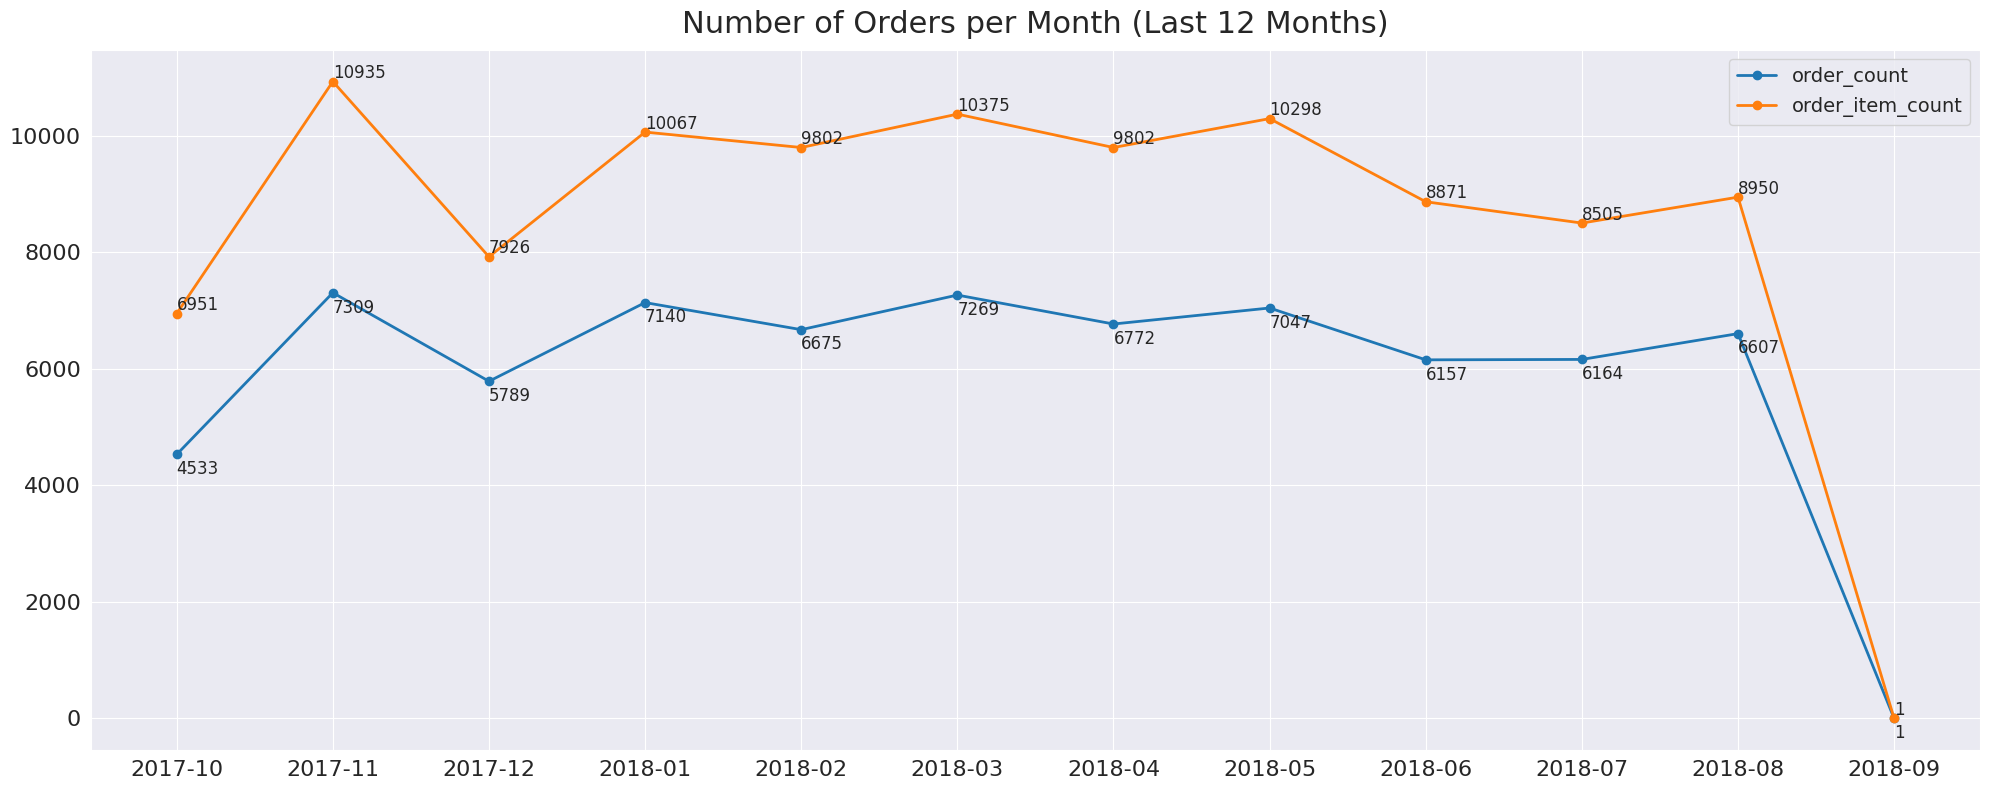

In [147]:
sns.set_style('darkgrid')

last_12_months_df = monthly_orders_df[-12:]

x = last_12_months_df.index.strftime('%Y-%m')
y = last_12_months_df[['order_count', 'order_item_count']]

plt.figure(figsize=(20, 8))
plt.plot(x, y, marker='o', linewidth=2)
plt.title('Number of Orders per Month (Last 12 Months)', fontsize=22, pad=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for i in range(len(last_12_months_df)):
    plt.text(
        x[i],
        last_12_months_df['order_count'][i] - 100,
        last_12_months_df['order_count'][i],
        ha='left',
        va='top',
        fontsize=12
    )
    plt.text(
        x[i],
        last_12_months_df['order_item_count'][i] - 10,
        last_12_months_df['order_item_count'][i],
        ha='left',
        va='bottom',
        fontsize=12
    )

plt.legend(y, fontsize=14)
plt.tight_layout()

- Berdasarkan visualisasi di atas, dapat diamati bahwa bulan dengan jumlah order **terbanyak** adalah **November 2017**.
- Selain itu, terdapat **penurunan drastis** yang signifikan pada bulan **September 2018**.

### By revenue

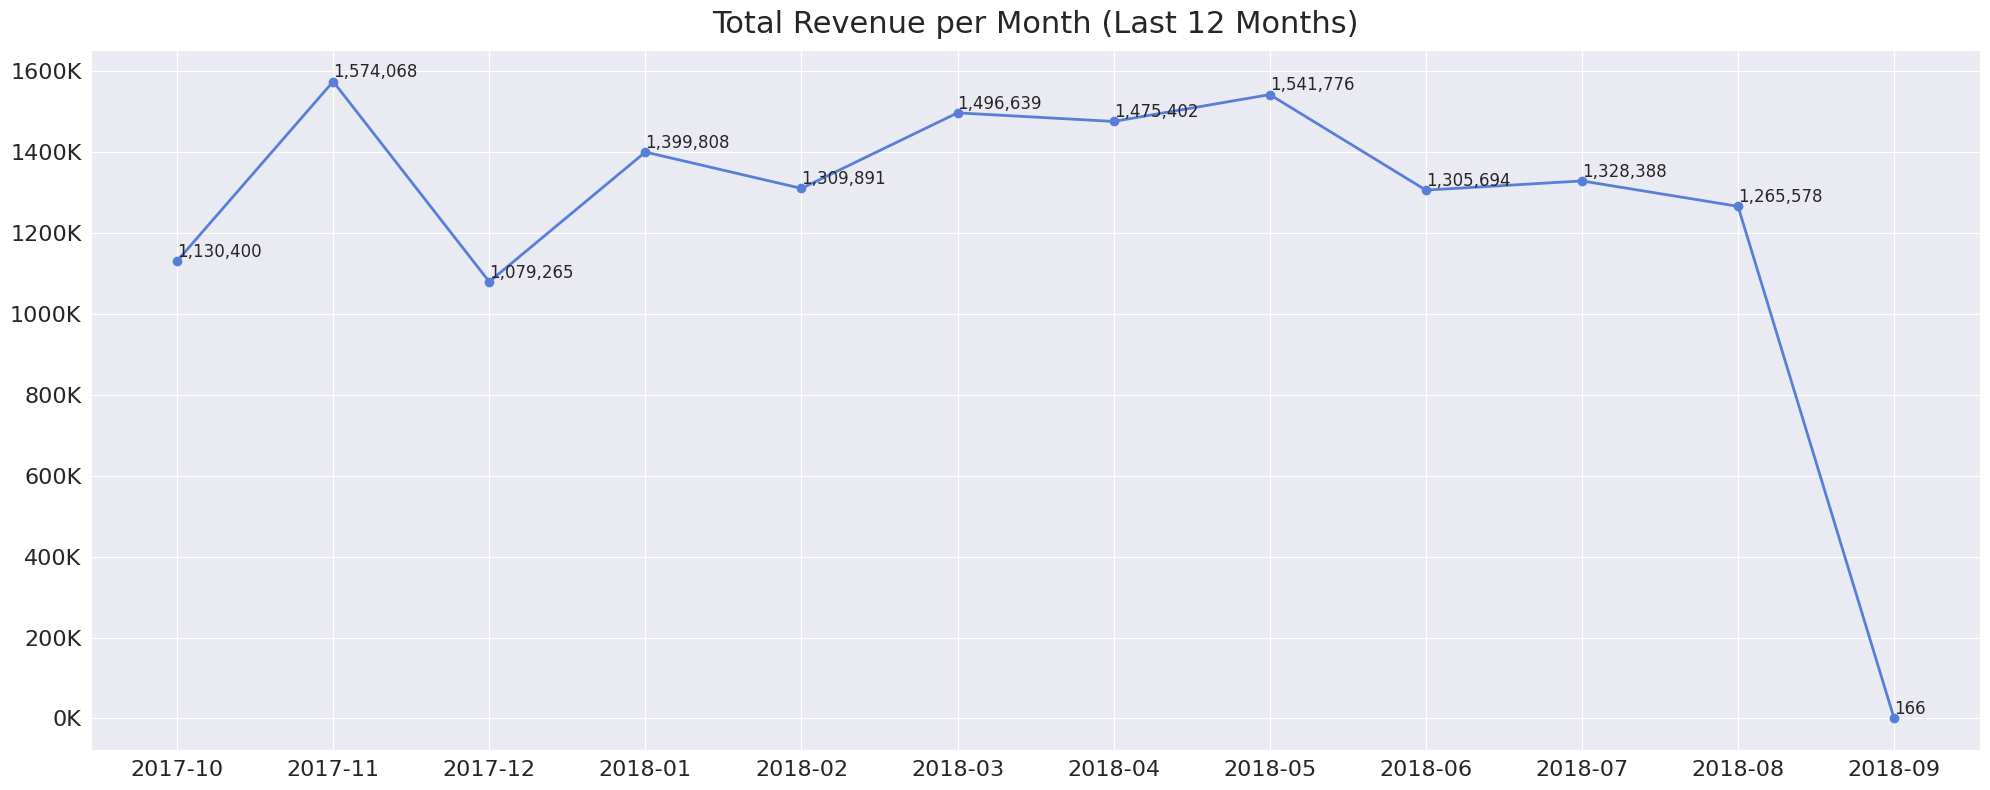

In [148]:
plt.figure(figsize=(20, 8))
plt.plot(
    x,
    last_12_months_df['revenue'],
    marker='o',
    linewidth=2,
    color='#577fd7'
)
plt.title('Total Revenue per Month (Last 12 Months)', fontsize=22, pad=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for i in range(len(last_12_months_df)):
    plt.text(
        x[i],
        last_12_months_df['revenue'][i] + 500,
        '{:,.0f}'.format(last_12_months_df['revenue'][i]),
        ha='left',
        va='bottom',
        fontsize=12
    )

# Mengatur formatter sumbu y
def format_func(value, tick_number):
    return f'{int(value/1000)}K'

formatter = ticker.FuncFormatter(format_func)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()

- Mengalami jumlah order penurunan yang sangat drastis pada bulan **September 2018**, tentunya hal ini akan menjadi dampak yang sangat besar bagi E-Commerce marketplace untuk keuntungan kedepannya.
- Untuk mengetahui penyebab penurunan tersebut, perlu mempertimbangkan analisis lebih lanjut terkait beberapa faktor seperti keberadaan kompetitor, kampanye pemasaran, dan lain sebagainya.

## 2nd Question

- Produk apa yang paling banyak dan paling sedikit terjual?

In [149]:
sum_order_items_df = all_df.groupby(by='product_category_name_english') \
  .order_item_id.sum() \
  .sort_values(ascending=False).reset_index()

sum_order_items_df

,product_category_name_english,order_item_id
0,Bed Bath Table,14795
1,Furniture Decor,12185
2,Health Beauty,11485
3,Sports Leisure,10348
4,Computers Accessories,10272
...,...,...
66,Arts and Craftmanship,26
67,La Cuisine,18
68,Cds Dvds Musicals,16
69,Fashion Childrens Clothes,8


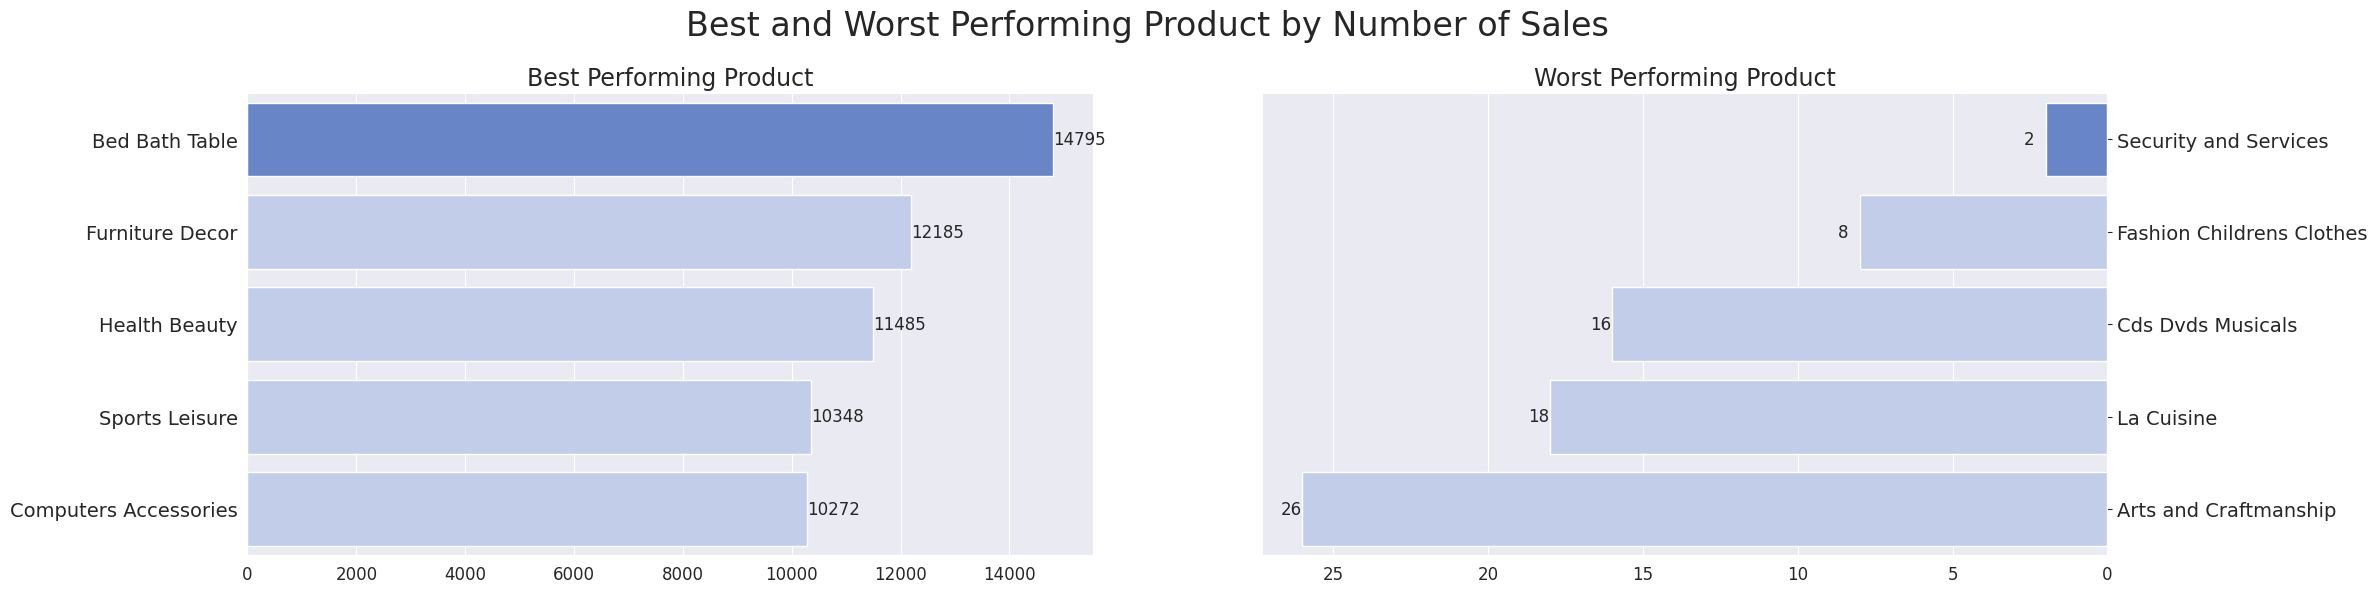

In [150]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ['#577fd7', '#bcccef', '#bcccef', '#bcccef', '#bcccef']

# Plot pertama
sns.barplot(
    x='order_item_id',
    y='product_category_name_english',
    data=sum_order_items_df.head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Best Performing Product', loc='center', fontsize=17)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].tick_params(axis='x', labelsize=12)

for i in range(len(sum_order_items_df.head(5))):
    ax[0].text(
        sum_order_items_df['order_item_id'].iloc[i] + 4,
        i,
        sum_order_items_df['order_item_id'].iloc[i],
        va='center',
        fontsize=12
    )

# Plot kedua
asc_sum_order = sum_order_items_df.sort_values(
    by='order_item_id', ascending=True
).head(5)

sns.barplot(
    x='order_item_id',
    y='product_category_name_english',
    data=asc_sum_order,
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Product', loc='center', fontsize=17)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].tick_params(axis='x', labelsize=12)

for i, value in enumerate(asc_sum_order['order_item_id']):
    ax[1].text(
        value + 0.7,
        i,
        value,
        va='center',
        fontsize=12
    )

plt.suptitle(
    'Best and Worst Performing Product by Number of Sales',
    fontsize=24, y=1.02
);

- Berdasarkan plot di atas, bahwa produk `Bed Bath Table` memiliki penjualan yang **paling tinggi**.
- Sedangkan, produk `Security and Services` memiliki penjualan yang **paling rendah**.

## 3rd Question

- Bagaimana distribusi skor review pada produk yang terjual dan berapa persentasenya setiap review?

### By number of review scores

In [151]:
review_scores = all_df['review_score'].value_counts().sort_values(ascending=False)
review_scores

5.0    66264
4.0    22286
1.0    14854
3.0     9840
2.0     4085
Name: review_score, dtype: int64

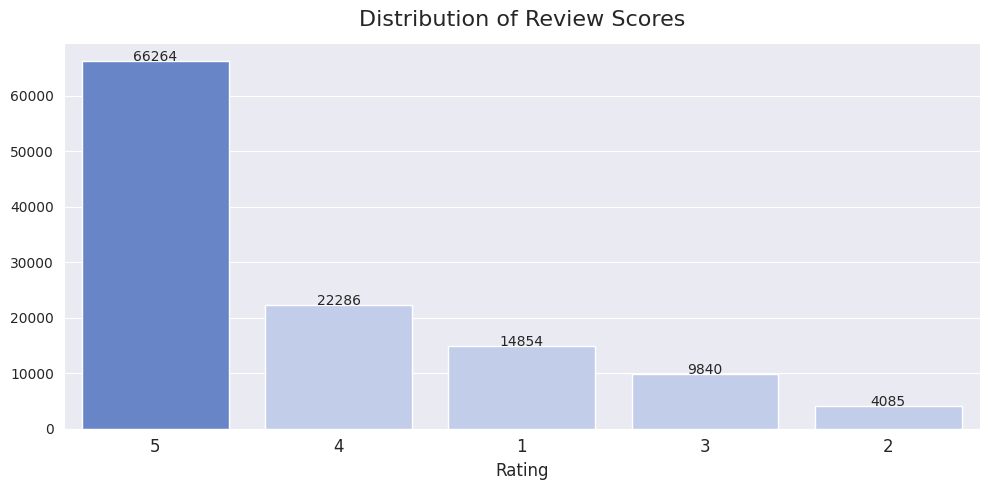

In [152]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=review_scores.index,
    y=review_scores.values,
    order=review_scores.index.astype(int),
    palette=colors
)

plt.title('Distribution of Review Scores', fontsize=16, pad=12)
plt.ylabel(None)
plt.xlabel('Rating', fontsize=12)
plt.tick_params(axis='x', labelsize=12)

for i, value in enumerate(review_scores.values):
    plt.text(
        y=value,
        x=i,
        s=value,
        ha='center',
        fontsize=10
    )

plt.tight_layout()

- Distribusi ini memberikan gambaran tentang seberapa sering masing-masing skor review muncul pada produk yang terjual.
- **Skor review 5** adalah yang paling banyak muncul dengan jumlah **66.264.**
- Ini menandakan produk yang dibeli sangat baik.

### By percentage review score

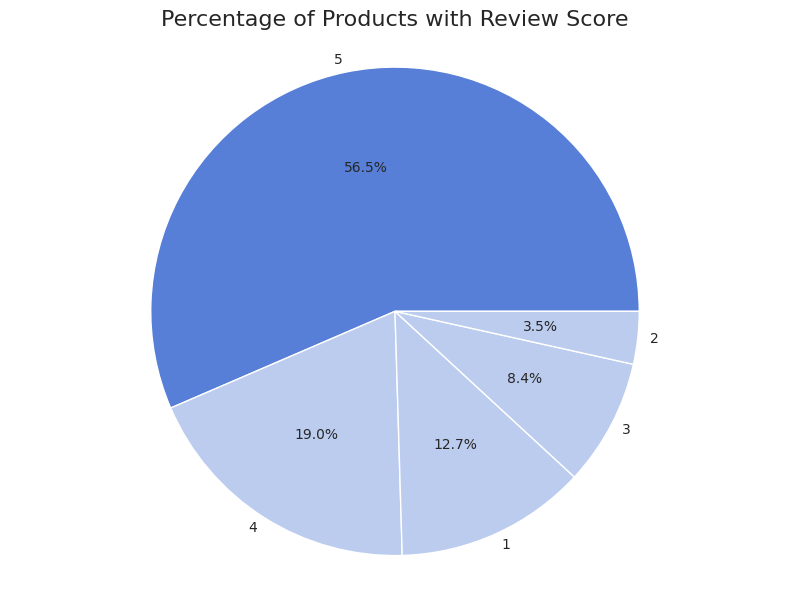

In [153]:
review_colors = {
    5: '#577fd7',
    4: '#bcccef',
    3: '#bcccef',
    2: '#bcccef',
    1: '#bcccef'
}

plt.figure(figsize=(8, 6))
percentages = (review_scores / review_scores.sum()) * 100

plt.pie(
    percentages,
    labels=percentages.index.astype(int),
    colors=[review_colors[key] for key in percentages.index.astype(int)],
    autopct='%1.1f%%',
    labeldistance=1.05
)
plt.title('Percentage of Products with Review Score', fontsize=16, pad=12)
plt.axis('equal')

plt.tight_layout()

- Persentase pada skor ulasan yang paling tinggi adalah **rating 5** dengan **56.5%**.

## 4th Question

- Bagaimana distribusi waktu pengiriman produk?

In [154]:
all_df['order_delivery_time']

0          8.0
1         16.0
2          8.0
3          6.0
4         25.0
          ... 
118302    17.0
118303     9.0
118304     5.0
118305     2.0
118306     5.0
Name: order_delivery_time, Length: 118307, dtype: float64

In [155]:
delivery_time_counts = all_df['order_delivery_time'].value_counts().sort_index()

delivery_time_table = pd.DataFrame({'Delivery Time (Days)': delivery_time_counts.index, 'Frequency': delivery_time_counts.values})
delivery_time_table = delivery_time_table.sort_values('Delivery Time (Days)')

delivery_time_table

,Delivery Time (Days),Frequency
0,1.0,574
1,2.0,3527
2,3.0,4135
3,4.0,5379
4,5.0,6273
...,...,...
139,194.0,1
140,195.0,2
141,196.0,1
142,208.0,1


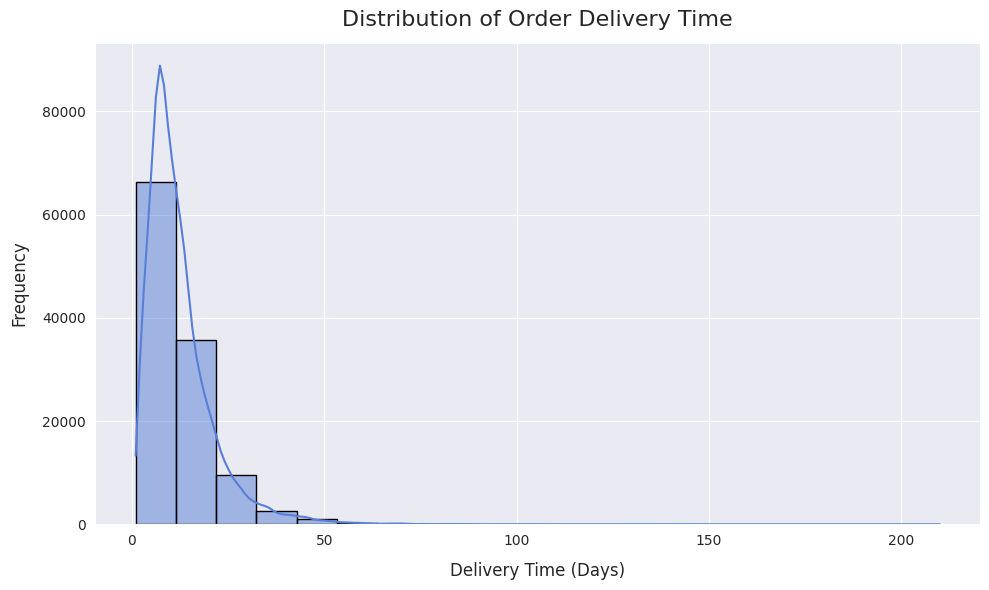

In [156]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=all_df,
    x='order_delivery_time',
    kde=True, bins=20, edgecolor='black',
    color='#577fd7'
)
plt.title('Distribution of Order Delivery Time', fontsize=16, pad=12)
plt.xlabel('Delivery Time (Days)', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)

plt.tight_layout()

- Terdapat beberapa pengiriman dengan waktu yang lebih lama, seperti 210 hari, yang memiliki frekuensi sebanyak 1. Namun, frekuensi pengiriman dengan waktu yang sangat lama ini sangat jarang terjadi.
- Sebagian besar pengiriman terjadi dalam rentang waktu 1 hingga 50 hari.

## 5th Question

- Bagaimana karakteristik demografis dari pelanggan di sektor e-commerce marketplace?

### By customer state

In [157]:
bystate_df = all_df.groupby(by='customer_state').order_id.nunique() \
  .sort_values(ascending=False) \
  .reset_index()

bystate_df.head()

,customer_state,order_id
0,SP,41374
1,RJ,12762
2,MG,11544
3,RS,5432
4,PR,4998


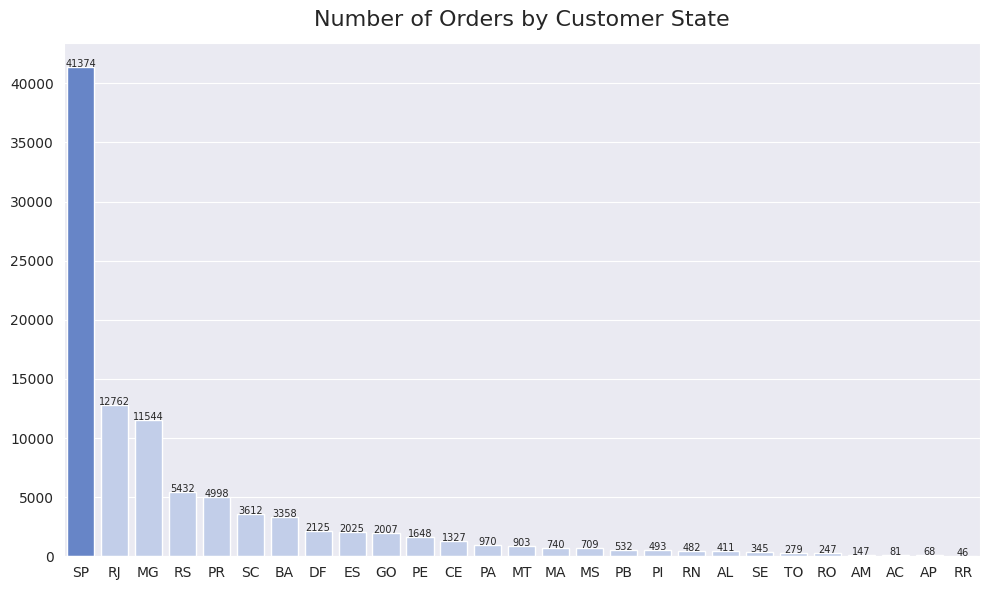

In [158]:
order_value_max = bystate_df.loc[bystate_df['order_id'].idxmax(), 'customer_state']

colors_ = [
    '#bcccef' if state != order_value_max else '#577fd7'
    for state in bystate_df['customer_state']
]

plt.figure(figsize=(10, 6))

sns.barplot(
    x=bystate_df['customer_state'],
    y=bystate_df['order_id'],
    palette=colors_
)
plt.title('Number of Orders by Customer State', fontsize=16, pad=12)
plt.xlabel(None)
plt.ylabel(None)

for i, value in enumerate(bystate_df['order_id']):
    plt.text(
        i,
        value,
        str(value),
        ha='center',
        fontsize=7
    )

plt.tight_layout()

- **SP** marupakan state yang paling banyak melakukan order.

### By customer city

In [159]:
bycity_df = all_df.groupby(by='customer_city').order_id.nunique() \
  .sort_values(ascending=False) \
  .reset_index().head(10)

bycity_df

,customer_city,order_id
0,Sao Paulo,15402
1,Rio De Janeiro,6834
2,Belo Horizonte,2750
3,Brasilia,2116
4,Curitiba,1510
5,Campinas,1429
6,Porto Alegre,1372
7,Salvador,1238
8,Guarulhos,1178
9,Sao Bernardo Do Campo,928


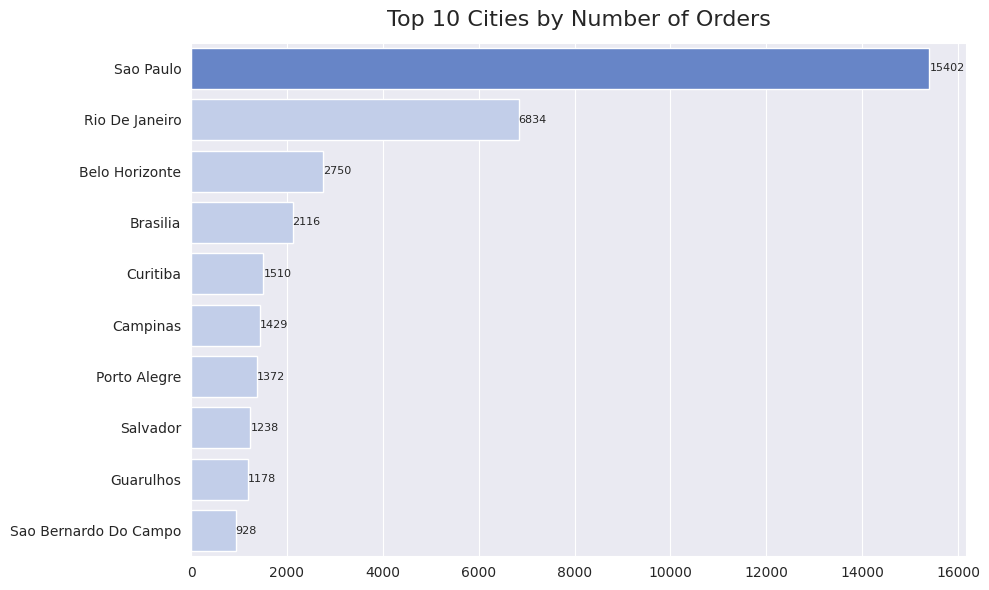

In [160]:
plt.figure(figsize=(10, 6))
sns.barplot(x='order_id', y='customer_city', data=bycity_df, palette=colors_)
plt.title('Top 10 Cities by Number of Orders', fontsize=16, pad=12)
plt.xlabel(None)
plt.ylabel(None)

for i, value in enumerate(bycity_df['order_id']):
    plt.text(value, i, str(value), ha='left', va='center', fontsize=8)

plt.tight_layout()

- Kota **Sao Paulo** memiliki jumlah order terbanyak.

### By payment type

In [161]:
bypayment_type_df = all_df.groupby(by='payment_type') \
  .order_id.nunique() \
  .sort_values(ascending=False).reset_index()

bypayment_type_df.head()

,payment_type,order_id
0,Credit Card,75991
1,Boleto,19614
2,Voucher,3766
3,Debit Card,1521


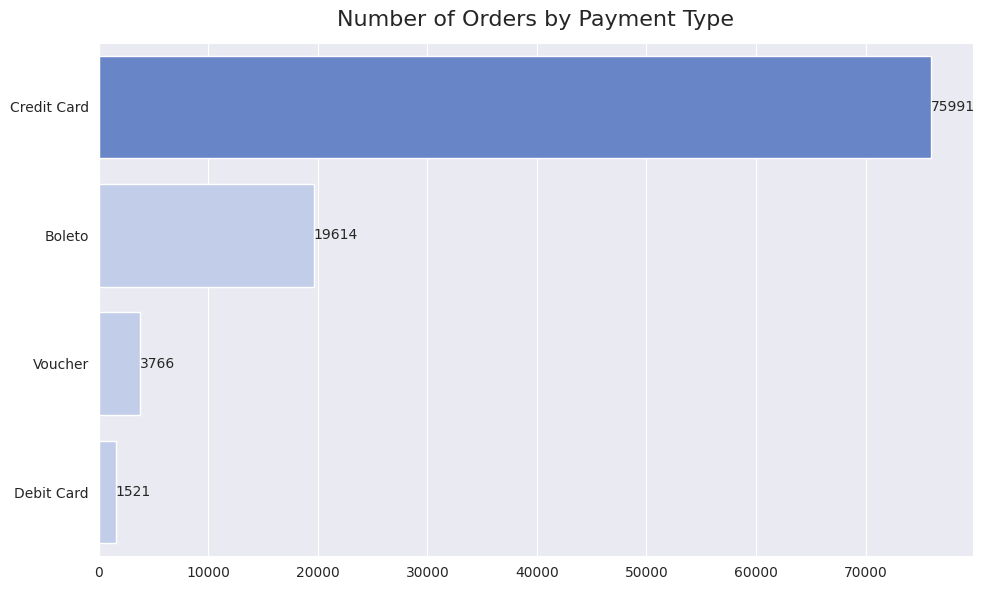

In [162]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='order_id',
    y='payment_type',
    data=bypayment_type_df,
    palette=colors
)
plt.title('Number of Orders by Payment Type', fontsize=16, pad=12)
plt.xlabel(None)
plt.ylabel(None)

for i, value in enumerate(bypayment_type_df['order_id']):
    plt.text(value, i, str(value), ha='left', va='center', fontsize=10)

plt.tight_layout()

- Berdasarkan output di atas, metode pembayaran yang paling umum digunakan adalah `credit_card`. Terdapat juga transaksi dengan jenis pembayaran (`debit_card`), yang jumlahnya sangat sedikit.

## 6th Question

- Apakah ada korelasi antara harga produk (`price`) dan biaya pengiriman (`freight_value`)?

In [163]:
all_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivery_time,estimated_delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,Volta Redonda,SP,Cool Stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,Cool Stuff,1,Credit Card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,No comment,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,Delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,8.0,871766c5855e863f6eccc05f988b23cb,28013,Campos Dos Goytacazes,RJ,Active
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,3471,Sao Paulo,SP,Pet Shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,Pet Shop,1,Credit Card,3,259.83,7b07bacd811c4117b742569b04ce3580,4.0,No comment,No comment,2017-05-13,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,Delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,2.0,eb28e67c4c0b83846050ddfb8a35d051,15775,Santa Fe Do Sul,SP,Active


In [164]:
correlation_matrix = all_df.corr()

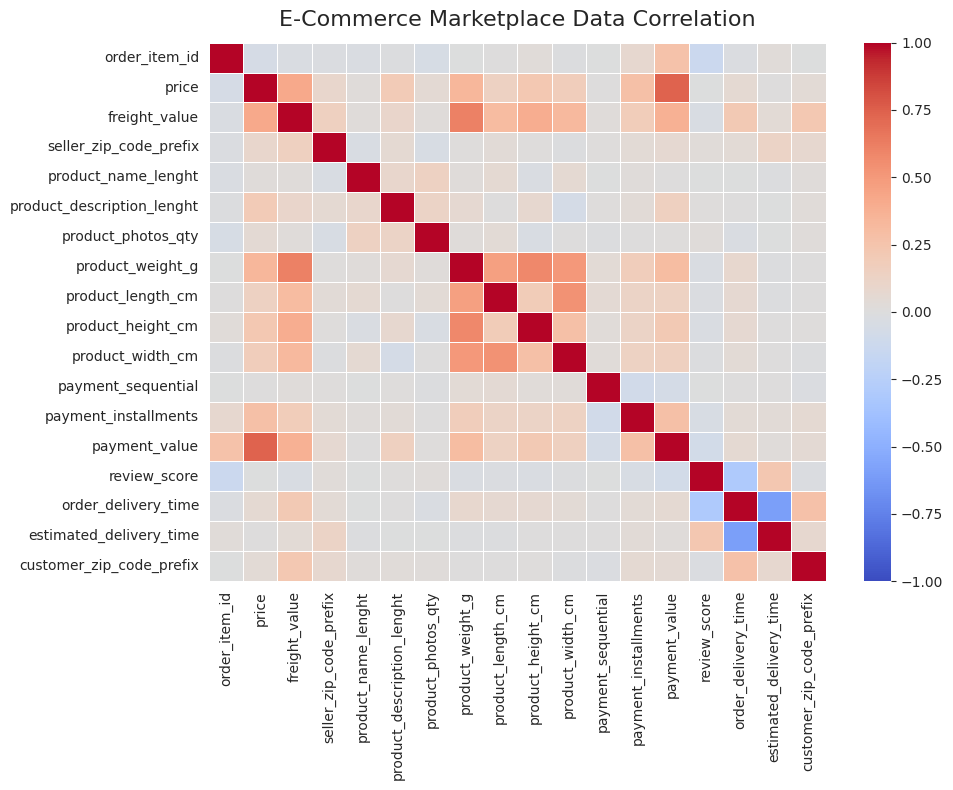

In [165]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=-1., vmax=1., annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('E-Commerce Marketplace Data Correlation', fontsize=16, pad=12)

plt.tight_layout()

- Output ini menunjukkan koefisien korelasi dengan variabel lain dalam DataFrame `correlation_matrix` terhadap **E-Commerce marketplace**.

In [166]:
correlation_matrix['price']

order_item_id                -0.060449
price                         1.000000
freight_value                 0.415934
seller_zip_code_prefix        0.088389
product_name_lenght           0.018011
product_description_lenght    0.201763
product_photos_qty            0.052811
product_weight_g              0.339365
product_length_cm             0.145579
product_height_cm             0.224309
product_width_cm              0.172624
payment_sequential            0.006839
payment_installments          0.277642
payment_value                 0.739236
review_score                 -0.004515
order_delivery_time           0.061422
estimated_delivery_time       0.003519
customer_zip_code_prefix      0.043151
Name: price, dtype: float64

- Korelasi antara `price` dengan `freight_value` adalah sebesar **0.415934**, menunjukkan adanya **hubungan positif yang cukup kuat** antara **harga produk** dengan **biaya pengiriman**.
- Namun ada korelasi yang **kuat** yaitu Korelasi antara `price` dengan `payment_value` adalah sebesar **0.739236**, menunjukkan adanya **hubungan positif yang kuat** antara **harga produk** dengan **nilai pembayaran**.
- Sedangkan korelasi lainnya menunjukkan **korelasi positif sedang** maupun hubungan **lemah** atau tidak ada hubungan linier.

## 7th Question

- Bagaimana sebaran geolocation berdasarkan latitude dan longitude di Brasil?

In [167]:
geo_df.sample(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
150655,6186,-23.533869,-46.813915,osasco,SP
799301,74673,-16.647862,-49.232759,goiania,GO
424190,21020,-22.831170,-43.274088,rio de janeiro,RJ


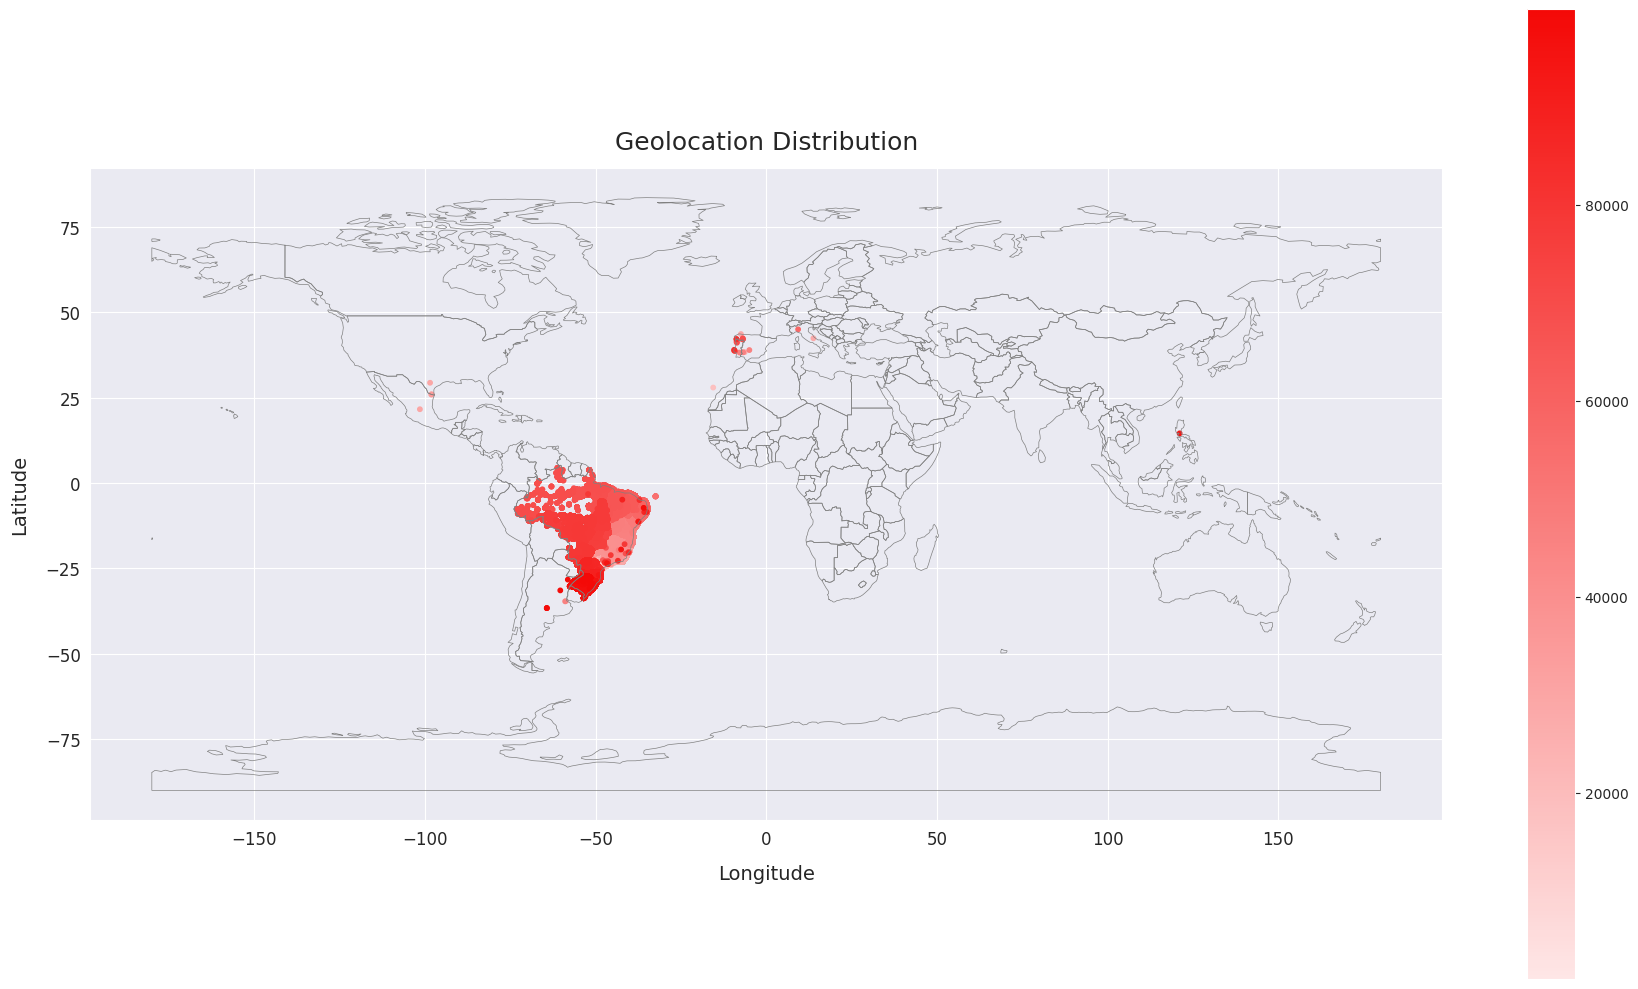

In [168]:
# Membuat GeoDataFrame dari DataFrame geo_df
gdf = gpd.GeoDataFrame(
    geo_df,
    geometry=gpd.points_from_xy(geo_df.geolocation_lng, geo_df.geolocation_lat)
)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Mengatur skala warna berdasarkan geolocation_zip_code_prefix
min_val = geo_df['geolocation_zip_code_prefix'].min()
max_val = geo_df['geolocation_zip_code_prefix'].max()
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#fee6e6', '#f40907'])

fig, ax = plt.subplots(figsize=(18, 10))
world.boundary.plot(ax=ax, linewidth=0.5, color='gray')
gdf.plot(
    ax=ax,
    markersize=10,
    column='geolocation_zip_code_prefix',
    cmap=cmap,
    legend=True
)
plt.title('Geolocation Distribution', fontsize=18, pad=14)
plt.xlabel('Longitude', fontsize=14, labelpad=12)
plt.ylabel('Latitude', fontsize=14, labelpad=12)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.tight_layout()

- Plot geolocation telah dibuat dengan menggambarkan batas negara menggunakan warna merah dan menampilkan titik geolocation.
- Gambar di atas menunjukkan **state SP** yang menempati posisi titik geolocation **paling banyak**.

In [169]:
gdf

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
0,1037,-23.545621,-46.639292,sao paulo,SP,POINT (-46.63929 -23.54562)
1,1046,-23.546081,-46.644820,sao paulo,SP,POINT (-46.64482 -23.54608)
2,1046,-23.546129,-46.642951,sao paulo,SP,POINT (-46.64295 -23.54613)
3,1041,-23.544392,-46.639499,sao paulo,SP,POINT (-46.63950 -23.54439)
4,1035,-23.541578,-46.641607,sao paulo,SP,POINT (-46.64161 -23.54158)
...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,POINT (-52.01071 -28.06864)
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,POINT (-52.22488 -27.87713)
1000160,99950,-28.071855,-52.014716,tapejara,RS,POINT (-52.01472 -28.07186)
1000161,99980,-28.388932,-51.846871,david canabarro,RS,POINT (-51.84687 -28.38893)


In [170]:
gdf.groupby(by='geolocation_state').geolocation_zip_code_prefix.nunique() \
  .sort_values(ascending=False) \
  .reset_index(name='count').head()

,geolocation_state,count
0,SP,6349
1,MG,1868
2,RJ,1390
3,RS,1132
4,PR,1046


## Save Data Files

In [171]:
all_df.to_csv('all_data.csv', index=False)
geo_df.to_csv('geolocation.csv', index=False)

# CONCLUSION & RECOMMENDATION

**Kesimpulan**
- Berdasarkan hasil analisis yang telah dilakukan pada E-Commerce Marketplace, terdapat beberapa temuan penting. Pertama, **performa penjualan, jumlah item pesanan, dan pendapatan** pada E-Commerce dalam beberapa bulan terakhir sangat fluktuatif. Bulan **November 2017** menunjukkan performa yang **sangat baik** dengan **jumlah order** dan **pendapatan yang tinggi**. Namun, terjadi penurunan drastis pada bulan **September 2018** yang berpotensi memberikan dampak **negatif** pada keuntungan kedepannya.

- Selanjutnya, produk yang **paling banyak terjual** adalah `Bed Bath Table`, sementara produk `Security and Services` memiliki penjualan yang **paling rendah**. Hal ini menunjukkan bahwa produk-produk dalam kategori `Bed Bath Table` memiliki popularitas yang tinggi di kalangan pelanggan.

- Dalam hal distribusi **skor review**, **skor 5** mendominasi total review **66.264** dengan **persentase 56.5%**, menandakan bahwa sebagian besar pelanggan memberikan ulasan yang sangat baik terhadap produk yang mereka beli. Ini menunjukkan tingkat kepuasan pelanggan yang tinggi.

- Distribusi waktu **pengiriman produk** cenderung berada dalam **rentang 1 hingga 50 hari**, dengan beberapa kasus **pengiriman lain** yang memakan waktu lebih lama. Namun, pengiriman dengan waktu yang sangat lama ini sangat jarang terjadi.

- Dalam hal **karakteristik demografis pelanggan**, negara bagian **SP** memiliki jumlah order yang **paling banyak**, salah satunya **kota Sao Paulo** merupakan kota dengan jumlah order terbanyak. **Metode pembayaran yang paling umum** digunakan adalah `credit_card`, sementara `debit_card` memiliki jumlah transaksi yang sangat sedikit.

- Terdapat **korelasi positif** yang **cukup kuat** antara **harga produk** dengan **biaya pengiriman**, menunjukkan bahwa semakin tinggi harga produk, semakin tinggi juga biaya pengiriman. Selain itu, terdapat **korelasi positif yang kuat** antara **harga produk** dengan **nilai pembayaran** (`payment_value`), menunjukkan bahwa semakin tinggi harga produk, semakin tinggi juga nilai pembayaran yang dilakukan oleh pelanggan.

- Sedangkan **sebaran geolocation** menunjukkan **state SP** yang menempati posisi titik geolocation **paling banyak** dan paling sedikit sebarannya adalah `geolocation_state` **AP**. Namun, perlu diketahui bahwa untuk memahami pola sebaran geolokasi secara lebih mendalam tentu harus adanya analisis lebih lanjut.

**Rekomendasi**

> Berdasarkan temuan-temuan ini, beberapa rekomendasi dapat diberikan. Pertama, perlu dilakukan analisis lebih lanjut untuk mengetahui **penyebab penurunan** performa pada **bulan September 2018**. Faktor seperti keberadaan kompetitor dan kampanye pemasaran perlu dipertimbangkan. Selain itu, perlu ditingkatkan upaya pemasaran untuk produk-produk dengan penjualan rendah, seperti `Security and Services`.

> Dalam hal **pengiriman produk**, perlu diperhatikan untuk memastikan bahwa pengiriman dilakukan dengan **tepat waktu** agar dapat memenuhi harapan pelanggan. Selain itu, perlu dipertimbangkan untuk menawarkan **metode pembayaran alternatif** yang lebih menarik bagi pelanggan, selain `credit_card`.


